Find the best classification scheme for the included dataset.
The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must operate 
as follows:<br>
1. read a market basket database from the csv file provided and 
generate a dataframe basket of boolean values with one row 
per transaction and one column per distinct item of the 
database; the dataframe values must be True if a distinct item 
is contained in the transaction
• the file contains one transaction per line, the first 
element is the number of items in the transaction, 
followed by the items of the transaction, and then a 
variable number of empty fields
• the field names in the first row of the csv file are not 
relevant
1. ignore the transactions containing a single item (2 points)
2. the column names of the output dataframe are the distinct items 
(2 points)
3. show the first five rows of the output dataframe (1 point)
4. show the number of transactions and of distinct items
(1 point)

In [302]:
# Open the file
file = open("mba.csv", mode="r")

# The transactions are separated by a ','
# We must also strip the '\n' at the end of the transaction
transactions = [line.strip("\n").split(",") for line in file.readlines()]

# The first line contains field names that are not relevant, so let's skip it
transactions = transactions[1:]

# The first item in every transaction is a number of the items in the transaction
# we want to use it to slice the list, removing all the empty strings and the
# number itself
for i in range(len(transactions)):
    # The end index is the number of items in the transaction
    # plus one, because we have the number itself in the slot 0
    end_index = int(transactions[i][0]) + 1
    transactions[i] = transactions[i][1:end_index]

In [303]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

encoder = TransactionEncoder()
tr = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)
tr.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [304]:
print(tr.shape)

(9835, 169)


5. find a value of min_support such that the apriori algorithm 
generates at least 8 frequent itemsets with at least 2 items
 (5 points)
• output the result with the message below
• min_support: 0.xxxx - number of itemsets with at least 2 
items: nn)
6. find the minimum metric threshold such that at least 10 
association rules are extracted from the frequent itemsets found
(5 points)
• use "confidence" as metric and output the line below:
• Metric: "confidence" - min_metric: 0.xxxx - Number of 
rules: n
7. print the first 10 rules found, sorted by descending confidence 
and support (3 points)
8. plot confidence and support for all the sorted rules found
(3 points)
9. scatter plot the rules by confidence and support, labelling the 
points with the index value of the corresponding rule
(hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point)

In [305]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

for min_sup in np.arange(1, 0, -0.01):
    frequent_itemsets = apriori(tr, use_colnames=True, min_support=min_sup)
    temp = frequent_itemsets["itemsets"].apply(lambda x: len(x) >= 2).eq(True).sum()
    if temp >= 8:
        break
min_sup, temp

(0.03999999999999915, 9)

In [306]:
for threshold in np.arange(1, 0, -0.01):
    rules = association_rules(
        frequent_itemsets, min_threshold=threshold, metric="confidence"
    )
    if rules.shape[0] >= 10:
        break

threshold, rules.shape[0]

(0.22999999999999932, 10)

In [307]:
rules = rules.sort_values(by=["confidence", "support"], ascending=False).reset_index(
    drop=True
)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
2,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
3,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
4,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
5,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
6,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
9,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620,0.201713


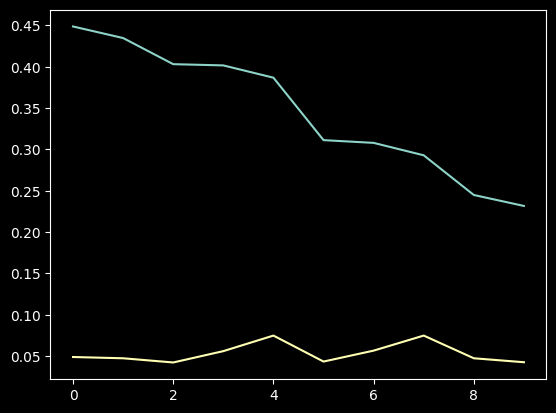

In [308]:
import matplotlib.pyplot as plt

plt.plot(rules["confidence"])
plt.plot(rules["support"])

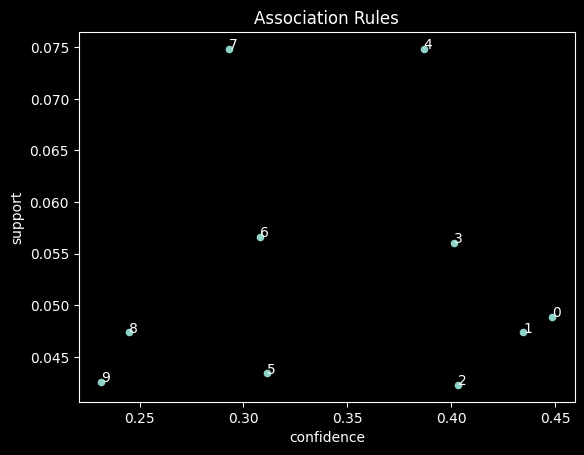

In [309]:
# Create a scatter plot of the sorted rules
fig = rules.plot.scatter(x="confidence", y="support", title="Association Rules")

# Iterate over all the rules and annotate them with their index
for i in range(len(rules)):
    fig.annotate(text=i, xy=(rules["confidence"][i], rules["support"][i]))